In [42]:
#1st Question
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

df= pd.read_excel('training_mathbert.xlsx')

# Feature columns and label
X = df.iloc[:, :-1]  # All columns except the last one are features
y = df['output']     # The last column is the target label

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [43]:
#1st Question
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report



# Assuming the last column is 'output' and the rest are features
X = df.drop(columns=['output'])
y = df['output']

# Convert the target variable to binary based on the threshold of 4
y_binary = np.where(y > 4, 1, 0)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a K-Nearest Neighbors classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict on the test set
y_pred_train = knn.predict(X_train)
y_pred_test = knn.predict(X_test)

# Evaluate the model
conf_matrix_train = confusion_matrix(y_train, y_pred_train)
conf_matrix_test = confusion_matrix(y_test, y_pred_test)

print("Training Confusion Matrix:\n", conf_matrix_train)
print("\nTest Confusion Matrix:\n", conf_matrix_test)

# Calculate other performance metrics
classification_report_train = classification_report(y_train, y_pred_train)
classification_report_test = classification_report(y_test, y_pred_test)

print("\nTraining Classification Report:\n", classification_report_train)
print("\nTest Classification Report:\n", classification_report_test)

Training Confusion Matrix:
 [[552  42]
 [ 77 117]]

Test Confusion Matrix:
 [[236  32]
 [ 34  36]]

Training Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.93      0.90       594
           1       0.74      0.60      0.66       194

    accuracy                           0.85       788
   macro avg       0.81      0.77      0.78       788
weighted avg       0.84      0.85      0.84       788


Test Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.88      0.88       268
           1       0.53      0.51      0.52        70

    accuracy                           0.80       338
   macro avg       0.70      0.70      0.70       338
weighted avg       0.80      0.80      0.80       338



In [2]:
##2nd Question

import numpy as np
import pandas as pd


df_purchase = pd.read_excel("Lab Session Data.xlsx", sheet_name=0, usecols='A:E')
A = df_purchase.iloc[:, 1:4]
C = df_purchase.iloc[:, 4]

print("Dimensionality of the vector space:", df_purchase.shape)
print("Number of vectors:", df_purchase.shape[0])
print("Rank of matrix A:", np.linalg.matrix_rank(A))

A_inv = np.linalg.pinv(A)
price_of_each_item = (A_inv @ C)
print("Price of each item:", price_of_each_item)

# Calculate MSE, RMSE, MAPE and R2 scores for the price prediction
y = C
y_pred = A @ price_of_each_item
MSE = np.square(np.subtract(y,y_pred)).mean()
RMSE = np.sqrt(MSE)
MAPE = np.mean(np.abs((y - y_pred) / y)) * 100
R2 = 1 - (np.square(y - y_pred).sum() / np.square(y - y.mean()).sum())

print("MSE:", MSE)
print("RMSE:", RMSE)
print("MAPE:", MAPE)
print("R2:", R2)


Dimensionality of the vector space: (10, 5)
Number of vectors: 10
Rank of matrix A: 3
Price of each item: [ 1. 55. 18.]
MSE: 7.569025722286982e-26
RMSE: 2.7511862391134086e-13
MAPE: 1.2592697507360183e-13
R2: 1.0


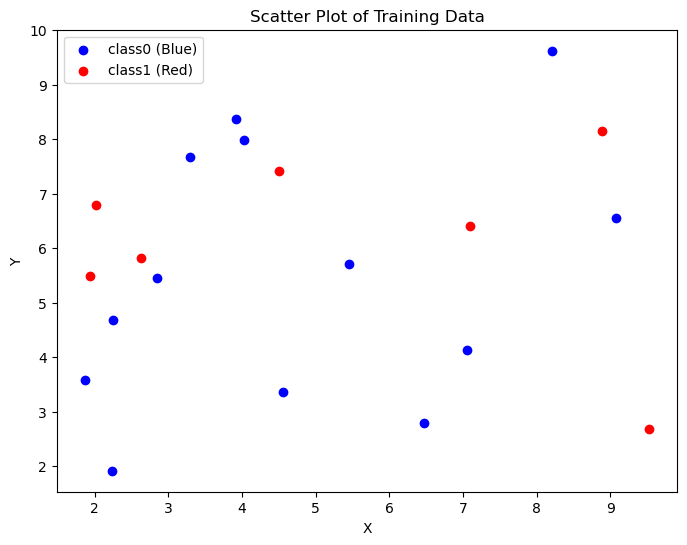

           X         Y   Class
0   3.300032  7.672732  class0
1   7.094392  6.411651  class1
2   2.233736  1.917943  class0
3   4.556473  3.360167  class0
4   2.623516  5.824338  class1
5   6.471926  2.794951  class0
6   9.522290  2.677197  class1
7   8.889076  8.149573  class1
8   5.448423  5.714559  class0
9   4.031015  7.993130  class0
10  3.912562  8.373472  class0
11  8.210563  9.622444  class0
12  9.074470  6.548502  class0
13  2.251104  4.680004  class0
14  4.495723  7.409668  class1
15  2.839538  5.455965  class0
16  1.871542  3.573045  class0
17  7.058577  4.140847  class0
18  2.013216  6.794483  class1
19  1.938200  5.491247  class1


In [4]:
#3rd Question
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generate 20 random data points for X and Y, with values ranging between 1 and 10
X = np.random.uniform(1, 10, 20)
Y = np.random.uniform(1, 10, 20)

# Assign these points to two different classes randomly
classes = np.random.choice(['class0', 'class1'], size=20)

# Create a DataFrame with X, Y, and Class columns
df = pd.DataFrame({'X': X, 'Y': Y, 'Class': classes})

# Separate the points based on their class
X_class0 = df[df['Class'] == 'class0']['X']
Y_class0 = df[df['Class'] == 'class0']['Y']
X_class1 = df[df['Class'] == 'class1']['X']
Y_class1 = df[df['Class'] == 'class1']['Y']

# Create a scatter plot of the data points
plt.figure(figsize=(8, 6))
plt.scatter(X_class0, Y_class0, c='blue', label='class0 (Blue)')
plt.scatter(X_class1, Y_class1, c='red', label='class1 (Red)')

# Add labels and title
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot of Training Data')

plt.legend(loc='best')

plt.show()

# Display the DataFrame
print(df)


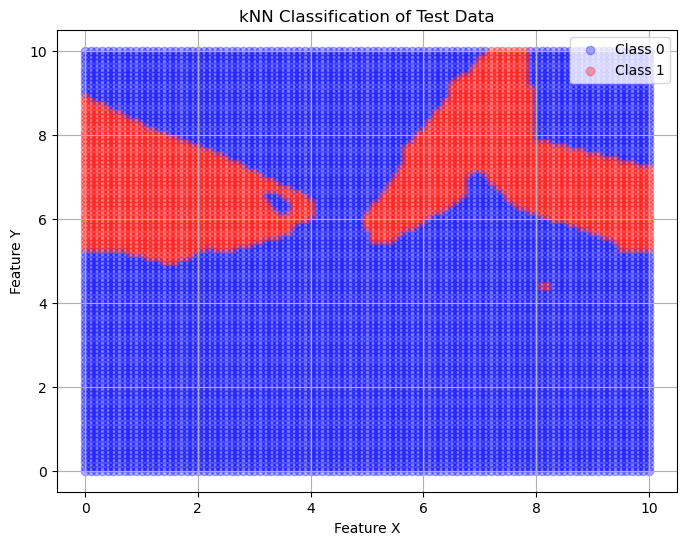

In [6]:
#4th Question
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier


X_test = np.arange(0, 10.1, 0.1)
Y_test = np.arange(0, 10.1, 0.1)
X_test, Y_test = np.meshgrid(X_test, Y_test)
test_data = pd.DataFrame({'X': X_test.ravel(), 'Y': Y_test.ravel()})

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(df[['X', 'Y']], df['Class'])

# Classify the test data
test_data['Class'] = knn.predict(test_data[['X', 'Y']])

plt.figure(figsize=(8, 6))
plt.scatter(test_data['X'][test_data['Class'] == 'class0'], test_data['Y'][test_data['Class'] == 'class0'], color='blue', label='Class 0', alpha=0.3)
plt.scatter(test_data['X'][test_data['Class'] == 'class1'], test_data['Y'][test_data['Class'] == 'class1'], color='red', label='Class 1', alpha=0.3)

plt.xlabel('Feature X')
plt.ylabel('Feature Y')
plt.title('kNN Classification of Test Data')
plt.legend()
plt.grid(True)

plt.show()


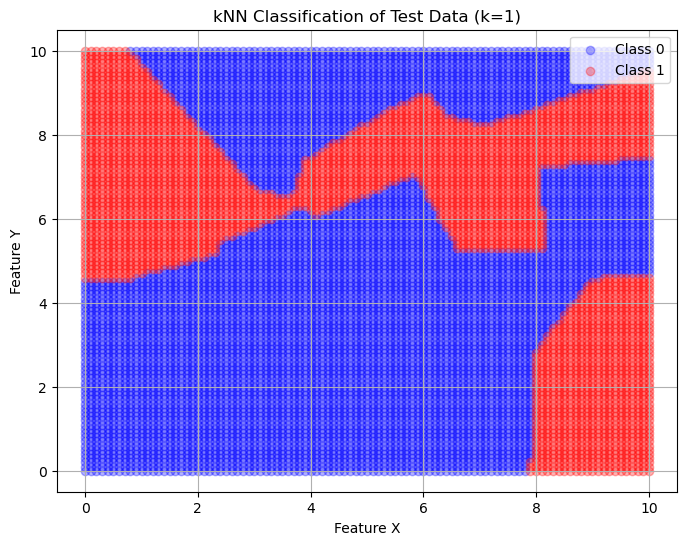

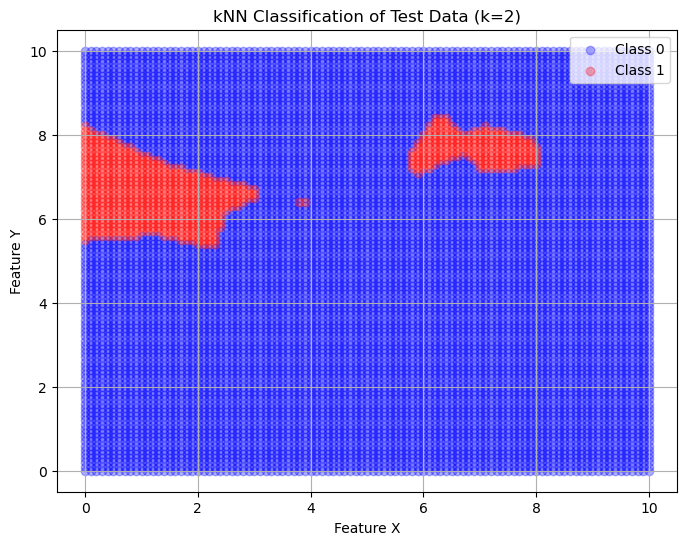

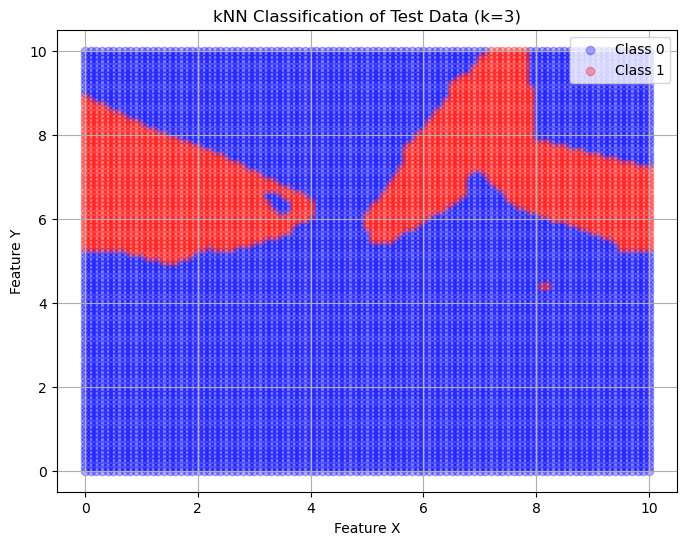

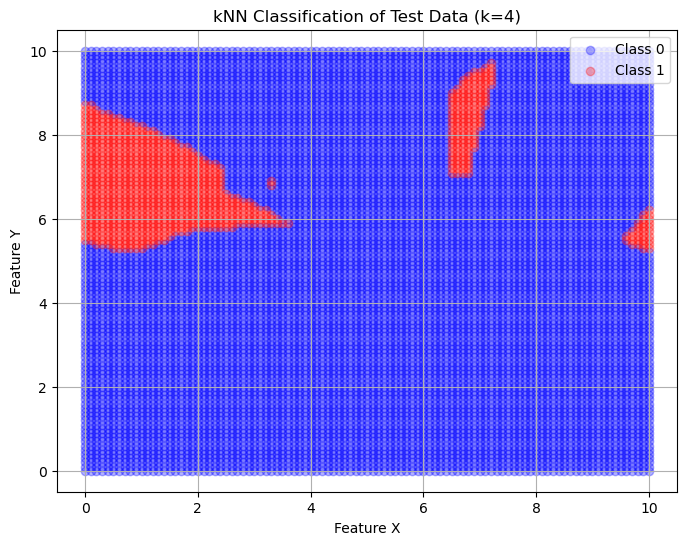

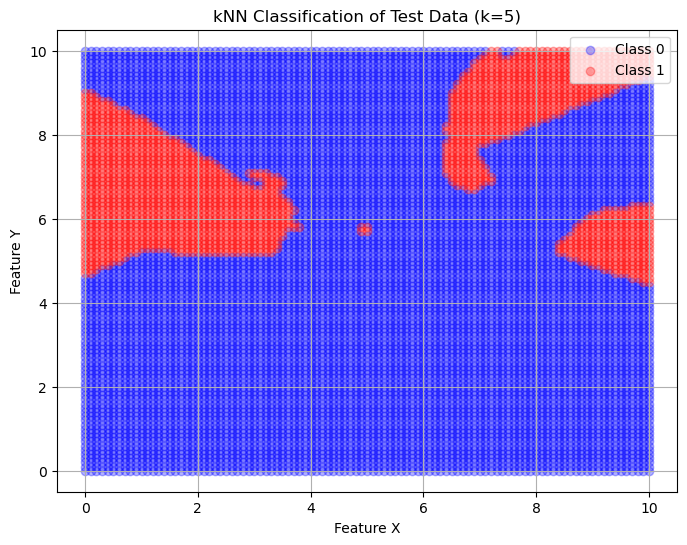

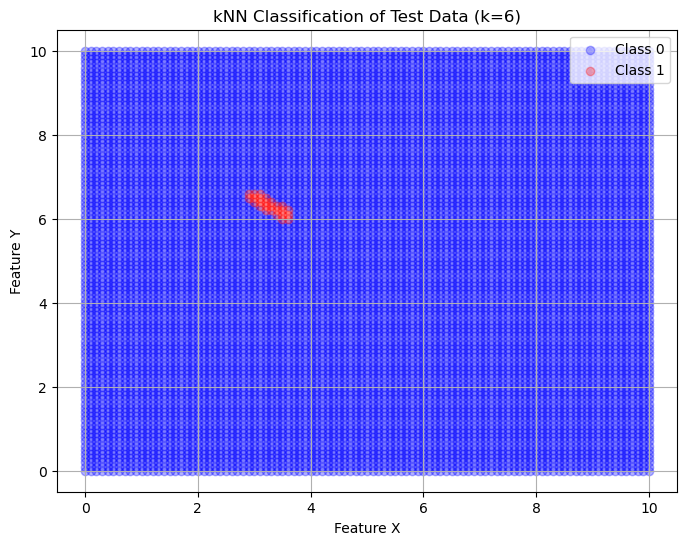

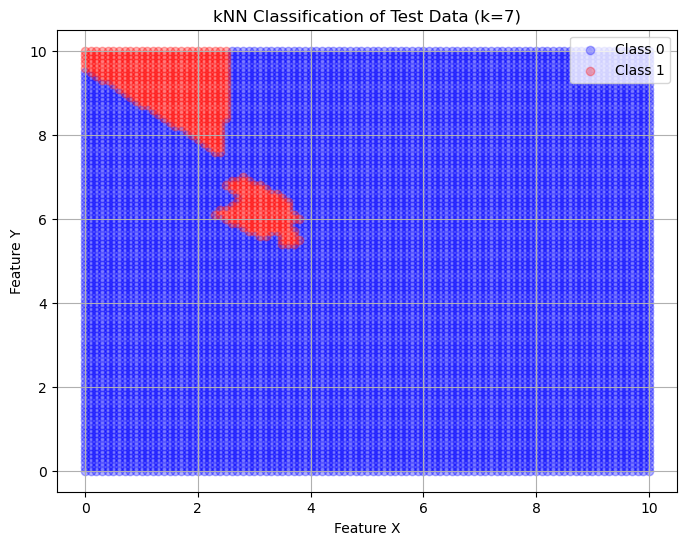

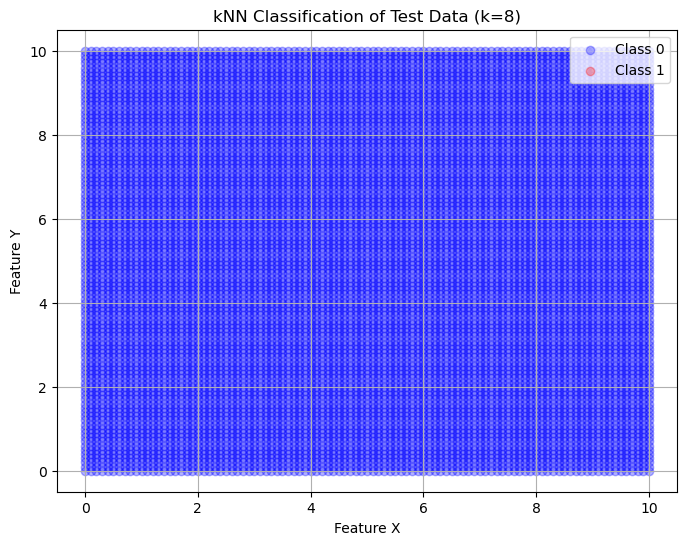

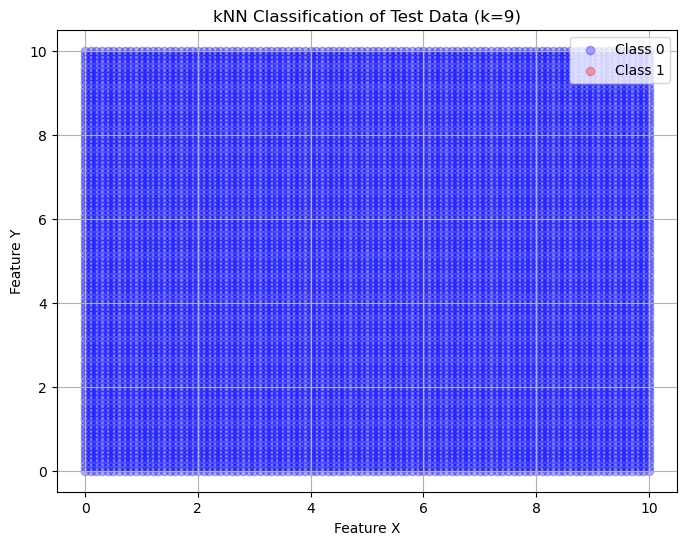

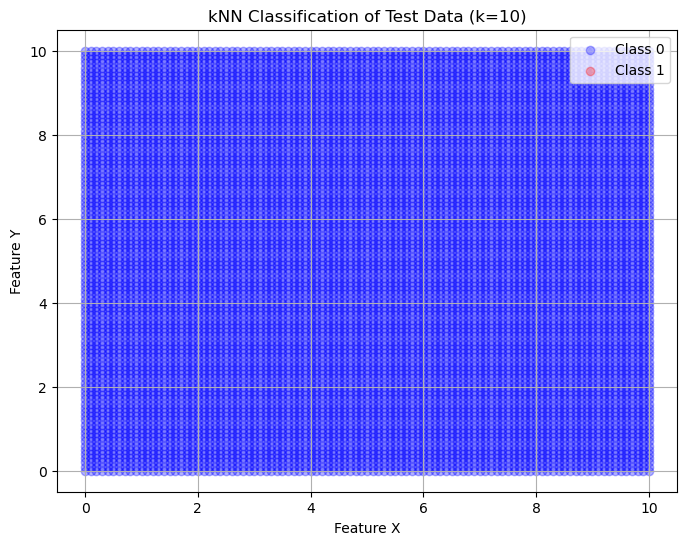

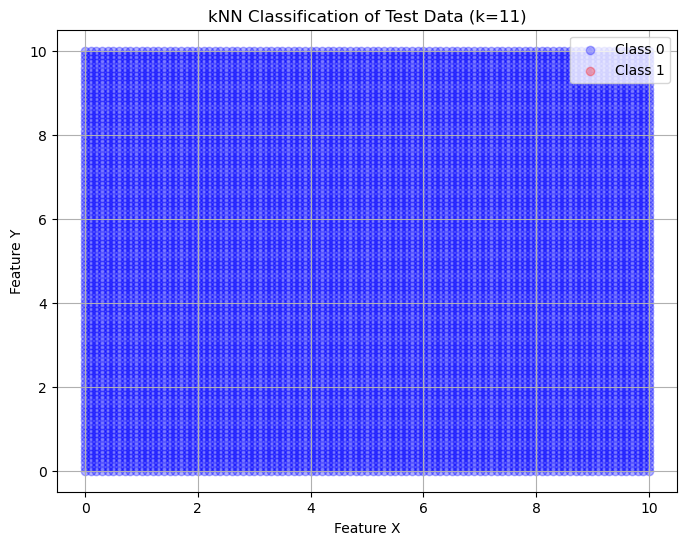

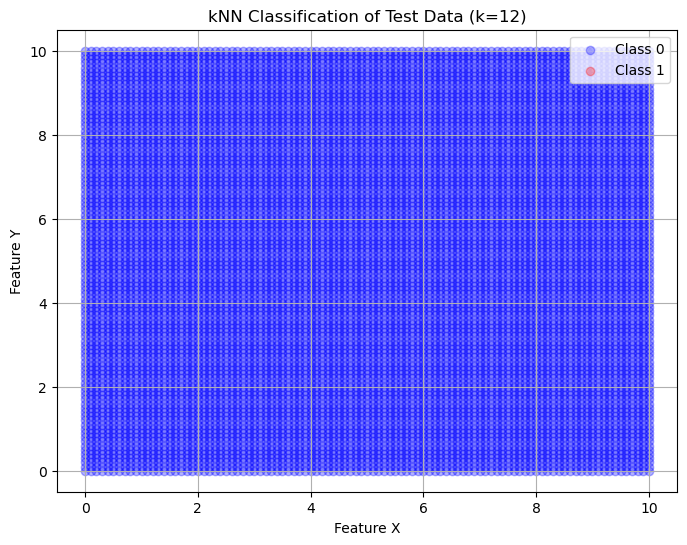

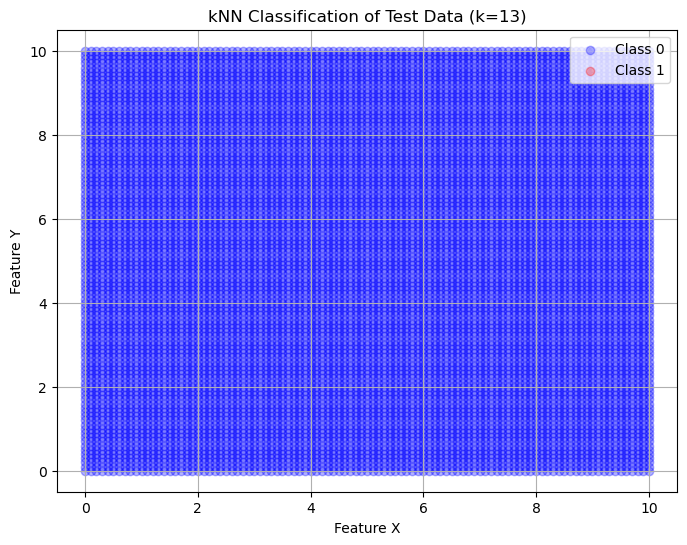

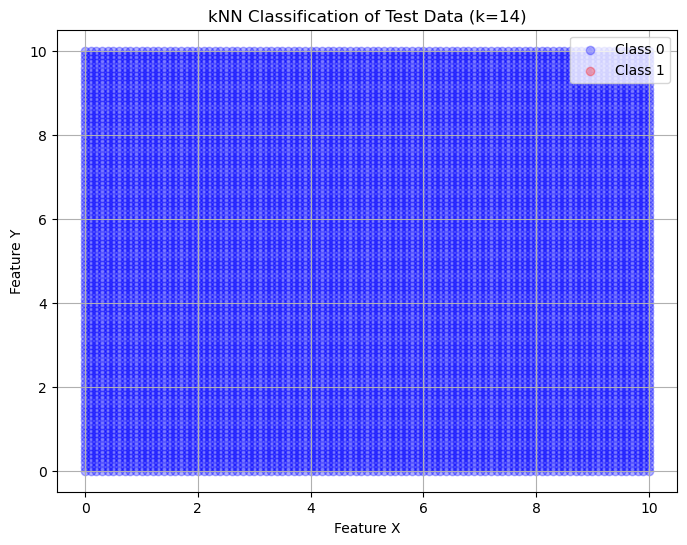

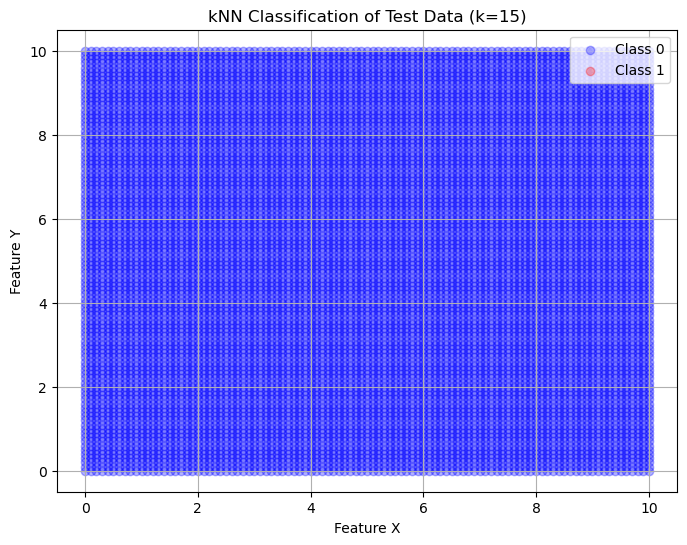

In [8]:
#5th Question

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier


X_test = np.arange(0, 10.1, 0.1)
Y_test = np.arange(0, 10.1, 0.1)
X_test, Y_test = np.meshgrid(X_test, Y_test)
test_data = pd.DataFrame({'X': X_test.ravel(), 'Y': Y_test.ravel()})

for k in range(1, 16):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(df[['X', 'Y']], df['Class'])

    test_data['Class'] = knn.predict(test_data[['X', 'Y']])

    plt.figure(figsize=(8, 6))
    plt.scatter(test_data['X'][test_data['Class'] == 'class0'], test_data['Y'][test_data['Class'] == 'class0'], color='blue', label='Class 0', alpha=0.3)
    plt.scatter(test_data['X'][test_data['Class'] == 'class1'], test_data['Y'][test_data['Class'] == 'class1'], color='red', label='Class 1', alpha=0.3)

    plt.xlabel('Feature X')
    plt.ylabel('Feature Y')
    plt.title(f'kNN Classification of Test Data (k={k})')
    plt.legend()
    plt.grid(True)

    plt.show()


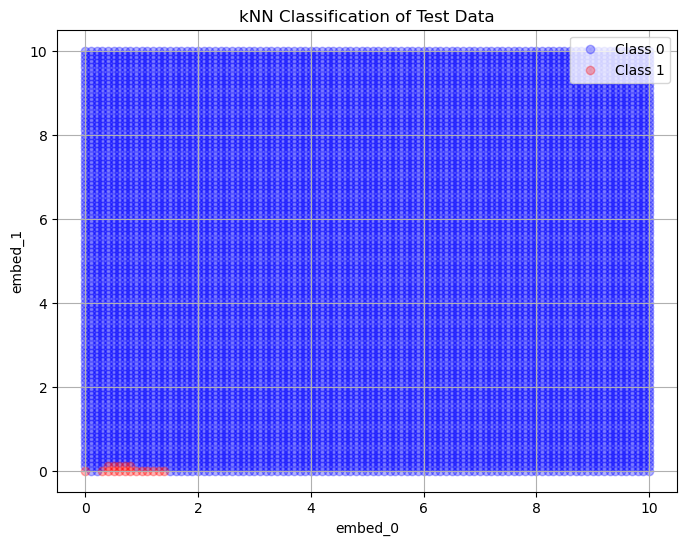

In [48]:
#6th Question
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier



# Binarize the output column (1 for values above 4, 0 for others)
df['output'] = df['output'].apply(lambda x: 1 if x > 4 else 0)

# Select features and target (here we select two features for visualization purposes)
df = df[['embed_0', 'embed_1', 'output']]

# Generate test data with values of X & Y varying between 0 and 10 with increments of 0.1
X_test = np.arange(0, 10.1, 0.1)
Y_test = np.arange(0, 10.1, 0.1)
X_test, Y_test = np.meshgrid(X_test, Y_test)
test_data = pd.DataFrame({
    'embed_0': X_test.ravel(),
    'embed_1': Y_test.ravel()
})

# Train the kNN classifier with k=3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(df[['embed_0', 'embed_1']], df['output'])

# Classify the test data
test_data['Class'] = knn.predict(test_data[['embed_0', 'embed_1']])

# Plotting the test data output with test points colored as per their predicted class
plt.figure(figsize=(8, 6))
plt.scatter(test_data['embed_0'][test_data['Class'] == 0],
            test_data['embed_1'][test_data['Class'] == 0],
            color='blue', label='Class 0', alpha=0.3)
plt.scatter(test_data['embed_0'][test_data['Class'] == 1],
            test_data['embed_1'][test_data['Class'] == 1],
            color='red', label='Class 1', alpha=0.3)

plt.xlabel('embed_0')
plt.ylabel('embed_1')
plt.title('kNN Classification of Test Data')
plt.legend()
plt.grid(True)
plt.show()


In [59]:
#7th Question
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score



# Binarize the 'output' column (1 for values above 4, 0 for others)
df['output'] = df['output'].apply(lambda x: 1 if x > 4 else 0)

# Select all embedding features as X and 'output' as y
X = df.drop(columns=['output'])
y = df['output']

# Define the parameter grid for GridSearchCV (searching for the best 'k' in kNN)
param_grid = {'n_neighbors': range(1, 8)}

# Initialize kNN classifier
knn = KNeighborsClassifier()

# Set up GridSearchCV to find the best 'k'
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the model
grid_search.fit(X, y)

# Output the best k value and the best cross-validation accuracy
print(f"Best k value: {grid_search.best_params_['n_neighbors']}")
print(f"Best cross-validation accuracy: {grid_search.best_score_:.4f}")



Best k value: 1
Best cross-validation accuracy: 1.0000
